# Regression

This code contains the Random Forest Regressor and the Gradient Boosting Regressor.

## Imports, data, and functions

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

### Dataset

Replace with the real dataset

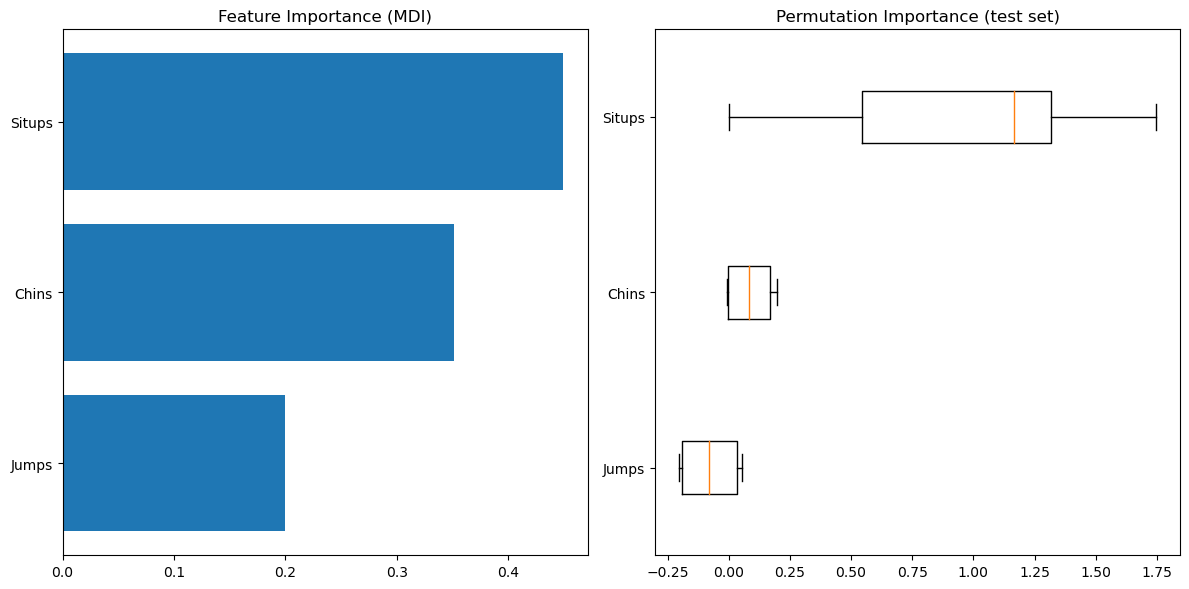

In [85]:
from sklearn.datasets import load_linnerud
linnerrud = load_linnerud()
X = linnerrud.data
y = linnerrud.target[:, 0]

X_train, X_test, y_train, y_test=train_test_split(X,y,train_size = 0.8, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Illustration of dataset. Taken from "https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression"
from sklearn.inspection import permutation_importance
reg = GradientBoostingRegressor(random_state=1)
#reg = RandomForestRegressor(random_state=1)
reg.fit(X_train, y_train)
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(linnerrud.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False,labels=np.array(linnerrud.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## Random Forest Regressor

In [86]:
def RFR(n_estimators, max_depth):
    rf = RandomForestRegressor(random_state=1)
    search_space = {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
    GS = GridSearchCV(estimator=rf,param_grid=search_space,scoring=["r2","neg_root_mean_squared_error"],refit="r2",cv=5,verbose=4)
    GS.fit(X_train_scaled,y_train)
    best_model = GS.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    print(f'Mean Squared Error Test: {mse}')
    print(f'R2 Test: {r2}')

RFR([50,100], [20,30])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; neg_root_mean_squared_error: (test=-35.851) r2: (test=-0.072) total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; neg_root_mean_squared_error: (test=-23.538) r2: (test=-8.626) total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; neg_root_mean_squared_error: (test=-4.382) r2: (test=0.899) total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; neg_root_mean_squared_error: (test=-30.055) r2: (test=-1.025) total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; neg_root_mean_squared_error: (test=-14.222) r2: (test=-1.402) total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; neg_root_mean_squared_er

[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; neg_root_mean_squared_error: (test=-39.836) r2: (test=-0.324) total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; neg_root_mean_squared_error: (test=-11.564) r2: (test=-1.324) total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; neg_root_mean_squared_error: (test=-15.750) r2: (test=-0.309) total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; neg_root_mean_squared_error: (test=-32.214) r2: (test=-1.327) total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; neg_root_mean_squared_error: (test=-9.462) r2: (test=-0.063) total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; neg_root_mean_squared_error: (test=-39.048) r2: (test=-0.272) total time=   

[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; neg_root_mean_squared_error: (test=-17.205) r2: (test=-2.515) total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; neg_root_mean_squared_error: (test=-39.327) r2: (test=-0.290) total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; neg_root_mean_squared_error: (test=-12.316) r2: (test=-1.635) total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; neg_root_mean_squared_error: (test=-16.697) r2: (test=-0.471) total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; neg_root_mean_squared_error: (test=-32.120) r2: (test=-1.313) total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; neg_root_mean_squared_error: (test=-9.710) r2: (test=-0.120) total time=   0.0s

[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; neg_root_mean_squared_error: (test=-39.271) r2: (test=-0.287) total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; neg_root_mean_squared_error: (test=-11.823) r2: (test=-1.429) total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; neg_root_mean_squared_error: (test=-15.299) r2: (test=-0.235) total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; neg_root_mean_squared_error: (test=-34.822) r2: (test=-1.719) total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; neg_root_mean_squared_error: (test=-11.407) r2: (test=-0.545) total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; neg_root_mean_squared_error: (test=-39.338) r2: (test=-0.291) total time=   0.0

## Gradient Boosting Regressor

In [87]:
def GBR(n_estimators, learning_rate):
    rf = GradientBoostingRegressor(random_state=1)
    search_space = {
        "n_estimators": n_estimators,
        "learning_rate": learning_rate,
        "max_depth": [3, 4, 5],  # Add max_depth as an example
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
    GS = GridSearchCV(estimator=rf,param_grid=search_space,scoring=["r2","neg_root_mean_squared_error"],refit="r2",cv=5,verbose=4)
    GS.fit(X_train,y_train)
    best_model = GS.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    print(f'Mean Squared Error Test: {mse}')
    print(f'R2 Test: {r2}')

GBR([250,300], [0.4,0.5])

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-40.902) r2: (test=-0.396) total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-14.051) r2: (test=-2.430) total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-21.730) r2: (test=-1.491) total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-54.417) r2: (test=-5.639) total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-12.116) r2: (test=-0.743) total time=   0.0s
[CV 1/5] END

[CV 3/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-30.198) r2: (test=-3.811) total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-25.599) r2: (test=-0.469) total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-16.605) r2: (test=-2.274) total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-46.379) r2: (test=-0.794) total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-22.864) r2: (test=-8.083) total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=3, min_samples_leaf=2, min_samp

[CV 5/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-15.238) r2: (test=-1.757) total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-37.468) r2: (test=-0.171) total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-15.187) r2: (test=-3.008) total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-24.128) r2: (test=-2.071) total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-53.976) r2: (test=-5.532) total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_sample

[CV 3/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-41.690) r2: (test=-8.169) total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-21.303) r2: (test=-0.018) total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-17.400) r2: (test=-2.595) total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-46.458) r2: (test=-0.801) total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-22.851) r2: (test=-8.072) total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=4, min_samples_leaf=2, min_s

[CV 4/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-56.177) r2: (test=-6.076) total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-26.028) r2: (test=-7.044) total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-47.762) r2: (test=-0.903) total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-16.477) r2: (test=-3.717) total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-23.950) r2: (test=-2.026) total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_sample

[CV 3/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-41.709) r2: (test=-8.177) total time=   0.0s
[CV 4/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-21.262) r2: (test=-0.014) total time=   0.0s
[CV 5/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-17.464) r2: (test=-2.621) total time=   0.0s
[CV 1/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-48.594) r2: (test=-0.970) total time=   0.0s
[CV 2/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-20.099) r2: (test=-6.018) total time=   0.0s
[CV 3/5] END learning_rate=0.4, max_depth=5, min_samples_leaf=4, min_sam

[CV 3/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-25.058) r2: (test=-2.313) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-58.914) r2: (test=-6.782) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-16.017) r2: (test=-2.046) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-49.146) r2: (test=-1.015) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-18.376) r2: (test=-4.867) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_sample

[CV 5/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-13.846) r2: (test=-1.276) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-48.624) r2: (test=-0.972) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-18.073) r2: (test=-4.675) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-26.149) r2: (test=-2.607) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=250; neg_root_mean_squared_error: (test=-12.440) r2: (test=0.653) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_sample

[CV 4/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-57.781) r2: (test=-6.486) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-21.704) r2: (test=-4.593) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-47.404) r2: (test=-0.875) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-17.883) r2: (test=-4.557) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-29.802) r2: (test=-3.685) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_sam

[CV 2/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-18.025) r2: (test=-4.645) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-26.188) r2: (test=-2.618) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-12.469) r2: (test=0.651) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-20.730) r2: (test=-4.102) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-48.624) r2: (test=-0.972) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples

[CV 2/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-17.883) r2: (test=-4.557) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-29.802) r2: (test=-3.685) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-56.787) r2: (test=-6.230) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=250; neg_root_mean_squared_error: (test=-22.405) r2: (test=-4.960) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; neg_root_mean_squared_error: (test=-47.422) r2: (test=-0.876) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_s

[CV 5/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; neg_root_mean_squared_error: (test=-20.730) r2: (test=-4.102) total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-48.624) r2: (test=-0.972) total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-18.073) r2: (test=-4.675) total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-26.149) r2: (test=-2.607) total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=250; neg_root_mean_squared_error: (test=-12.440) r2: (test=0.653) total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples